In [3]:
import pandas as pd

df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


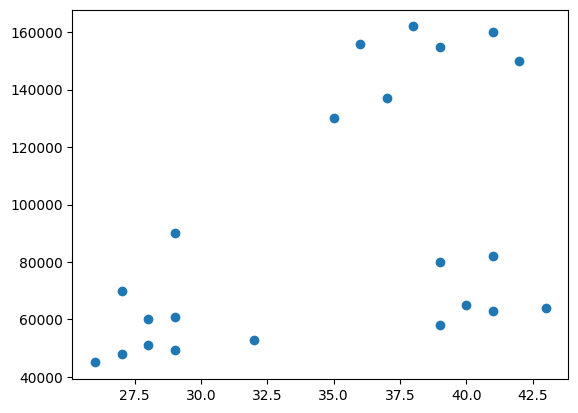

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Income($)'])

In [5]:
from sklearn.cluster import KMeans  

km  = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])
y_predict

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [7]:
df['Cluster'] = y_predict
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


C:\Users\User\AppData\Local\Temp\ipykernel_14956\427762939.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


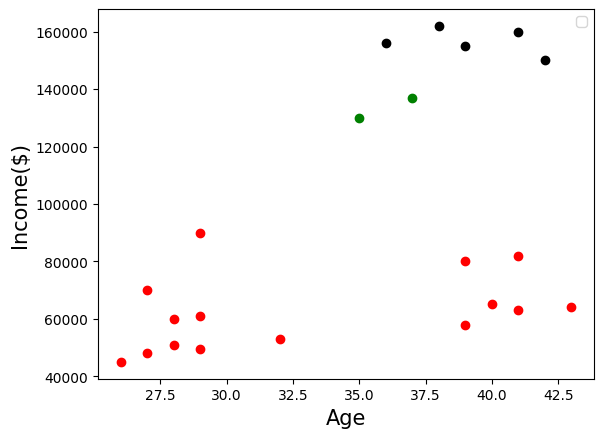

In [8]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

plt.scatter(df0.Age, df0['Income($)'], color='green')
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='black')

plt.xlabel('Age', fontsize=15)
plt.ylabel('Income($)', fontsize=15)
plt.legend()

In [9]:
# Scalling the data --> make big data range under 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [10]:
km = KMeans(n_clusters=3)

y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [11]:
df['Cluster'] = y_predict
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [12]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

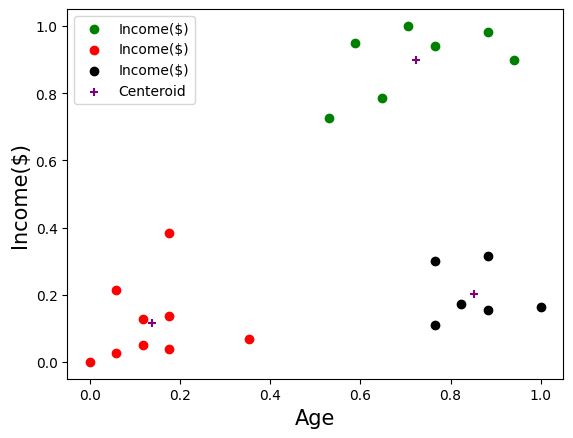

In [13]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

plt.scatter(df0.Age, df0['Income($)'], color='green', label = 'Income($)')
plt.scatter(df1.Age, df1['Income($)'], color='red', label='Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='black', label='Income($)')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='+', label='Centeroid')

plt.xlabel('Age', fontsize=15)
plt.ylabel('Income($)', fontsize=15)
plt.legend()

In [14]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [15]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.33664042529345833,
 0.22020960864009398,
 0.20882373373648921,
 0.14686902060545337,
 0.1321471082406226]

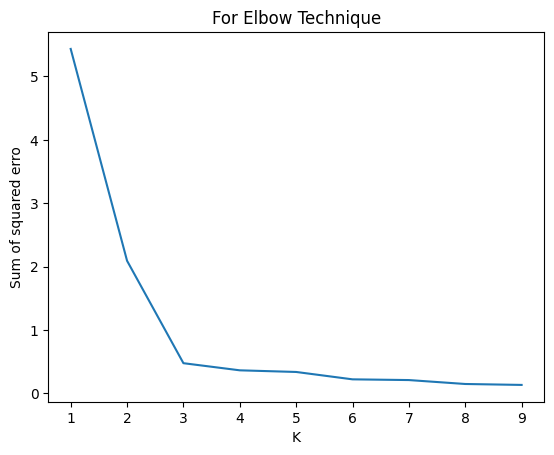

In [18]:
plt.title('For Elbow Technique')
plt.ylabel('Sum of squared erro')
plt.xlabel('K')
plt.plot(k_range,sse)
# plt.scatter(k_range,sse)